In [273]:
import pandas as pd
import numpy as np
from numpy import sqrt
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

In [2]:
all_files = glob.glob(r'C:\Users\sathvis\Desktop\p1_ips_data'+"/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)
frame12 = pd.concat(li, axis=0, ignore_index=True)

In [3]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling( window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(16,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [4]:
frame12.device_ip.unique()

array(['10.254.228.8', '192.168.224.3', '10.254.231.7', '10.254.208.5',
       '192.168.242.6', '10.51.30.15', '10.54.34.34', '10.54.30.13',
       '172.16.92.1', '192.168.14.132', '10.157.30.11'], dtype=object)

In [84]:
sam1=frame12[frame12['device_ip']=='10.254.228.8']

In [6]:
sam1.metric_text.unique()

array(['Availability', 'Win-CPU Load', 'Mem Usage Load', 'CPU Load',
       'Swap Mem Usage'], dtype=object)

In [7]:
sam1=sam1[sam1['metric_text']=='CPU Load'][['time','metric_text','value']]
sam1.index=pd.to_datetime(sam1['time'])
sam1=sam1.drop(['time'],axis=1)

In [8]:
sam1.head()

,metric_text,value
time,,
2019-04-10 00:00:00,CPU Load,0.833333
2019-04-10 00:01:00,CPU Load,1.125000
2019-04-10 00:02:00,CPU Load,1.375000
2019-04-10 00:03:00,CPU Load,1.041667
2019-04-10 00:04:00,CPU Load,1.291667


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


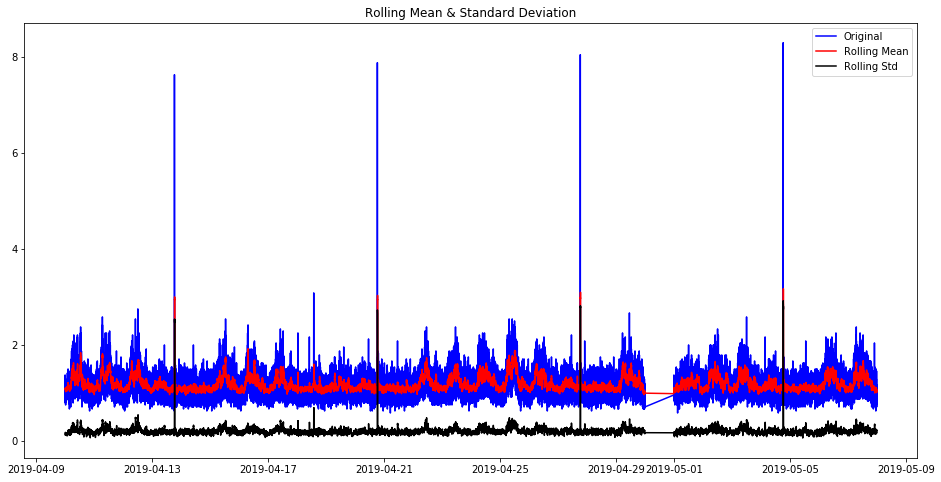

Results of Dickey-Fuller Test:
Test Statistic                -1.109845e+01
p-value                        3.919753e-20
#Lags Used                     5.300000e+01
Number of Observations Used    3.750100e+04
Critical Value (1%)           -3.430524e+00
Critical Value (5%)           -2.861617e+00
Critical Value (10%)          -2.566811e+00
dtype: float64


In [9]:
test_stationarity(sam1['value'])


In [10]:
sam1.index.min()

Timestamp('2019-04-10 00:00:00')

In [11]:
sam1.index.max()

Timestamp('2019-05-07 23:59:00')

In [12]:
train=sam1[:'2019-05-01 00:00:00']

In [13]:
test=sam1['2019-05-01 00:00:00':]

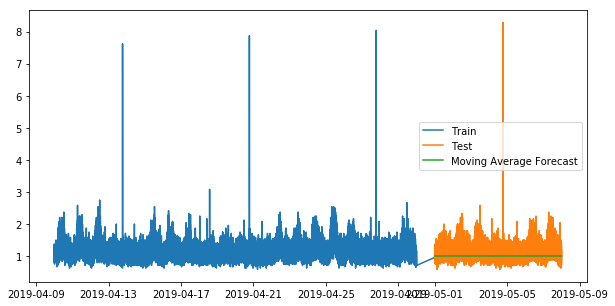

In [14]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['value'].rolling(15).mean().iloc[-1]
plt.figure(figsize=(10,5))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [15]:
rms = sqrt(mean_squared_error(test.value, y_hat_avg['moving_avg_forecast']))
print(rms)


0.32376575894581905


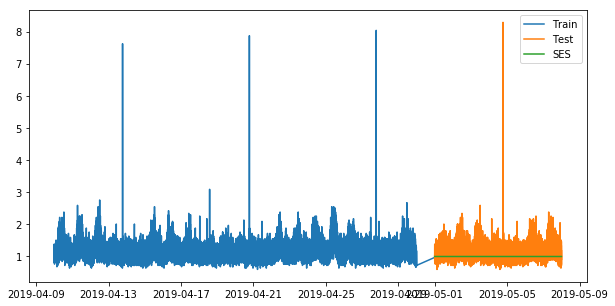

In [16]:

y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['value'])).fit(smoothing_level=0.1,optimized=True)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(10,5))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [17]:
rms = sqrt(mean_squared_error(test.value, y_hat_avg['SES']))
print(rms)


0.3328010514458384


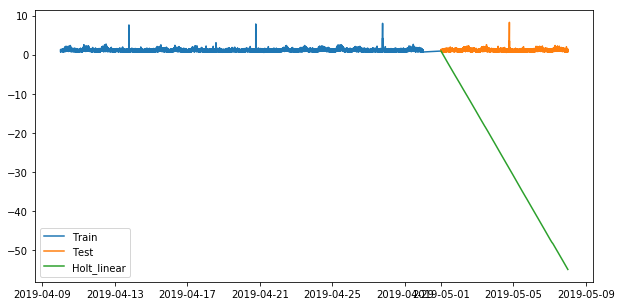

In [18]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,5))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()


In [19]:
rms = sqrt(mean_squared_error(test.value, y_hat_avg.Holt_linear))
print(rms)

32.451819618554474


In [20]:
sam2=frame12[frame12['device_ip']=='192.168.224.3']

In [21]:
sam2.metric_text.unique()

array(['Availability', 'CiscoMemoryUtilization', 'CiscoTemperature',
       'PacketLoss', 'RouterCPUUtilization', 'ResponseTime'], dtype=object)

In [25]:
sam2.head()

,customer_id,device_ip,interface,metric_text,date,time,hostname,metric_uid,value
13531,SCBATMS87816,192.168.224.3,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:00:00,ANUNTACHNDCCSW01.adaas.local,S1:P3,1.0
13532,SCBATMS87816,192.168.224.3,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:00:10,ANUNTACHNDCCSW01.adaas.local,S1:P3,1.0
13533,SCBATMS87816,192.168.224.3,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:00:20,ANUNTACHNDCCSW01.adaas.local,S1:P3,1.0
13534,SCBATMS87816,192.168.224.3,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:00:30,ANUNTACHNDCCSW01.adaas.local,S1:P3,1.0
13535,SCBATMS87816,192.168.224.3,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:00:40,ANUNTACHNDCCSW01.adaas.local,S1:P3,1.0


In [27]:
sam2=sam2[sam['metric_text']=='ResponseTime'][['time','metric_text','value']]
sam2.index=pd.to_datetime(sam2['time'])
sam2=sam2.drop(['time'],axis=1)

sam2.head()

,metric_text,value
time,,
2019-04-10 00:00:00,ResponseTime,45.0
2019-04-10 00:01:00,ResponseTime,37.0
2019-04-10 00:02:00,ResponseTime,35.0
2019-04-10 00:03:00,ResponseTime,35.0
2019-04-10 00:04:00,ResponseTime,41.0


In [28]:
sam2 = sam2.loc[sam2.index.duplicated(keep='first')]

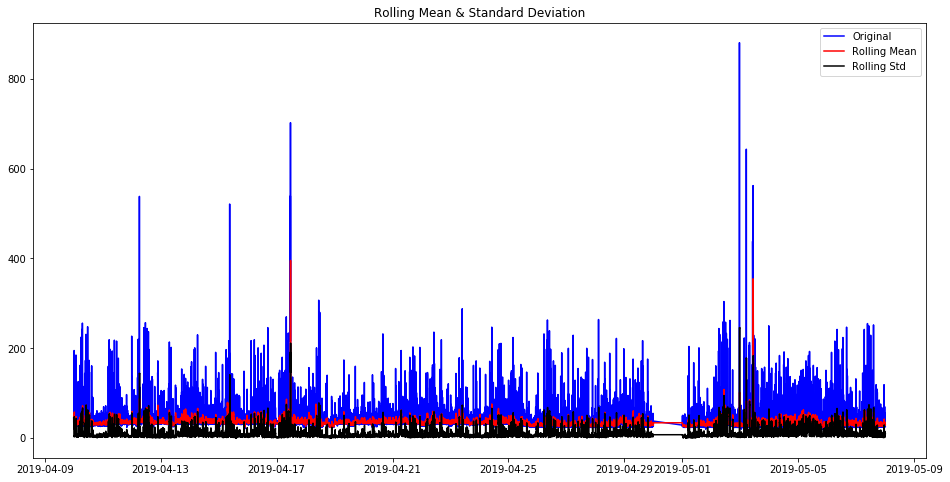

Results of Dickey-Fuller Test:
Test Statistic                   -23.784842
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    38372.000000
Critical Value (1%)               -3.430520
Critical Value (5%)               -2.861615
Critical Value (10%)              -2.566810
dtype: float64


In [29]:
test_stationarity(sam2['value'])

In [30]:
train=sam2[:'2019-05-01 00:00:00']
test=sam2['2019-05-01 00:00:00':]

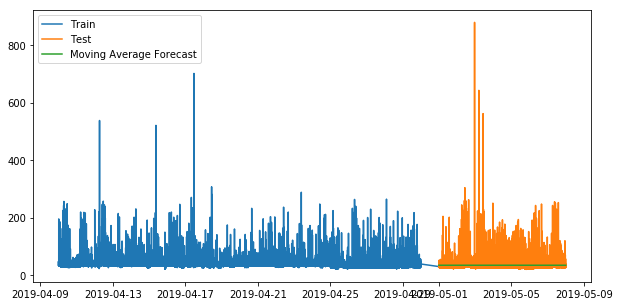

In [31]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['value'].rolling(15).mean().iloc[-1]
plt.figure(figsize=(10,5))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [32]:
rms = sqrt(mean_squared_error(test.value, y_hat_avg['moving_avg_forecast']))
print(rms)


29.275574662385974


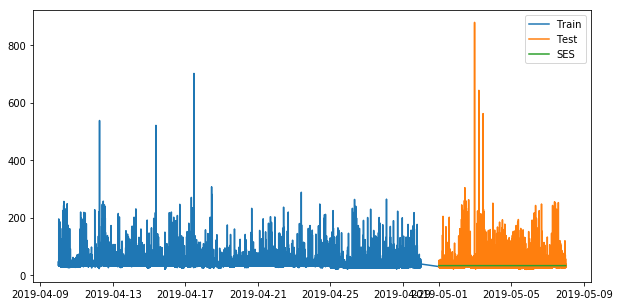

In [33]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['value'])).fit(smoothing_level=0.5,optimized=True)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(10,5))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [34]:
rms = sqrt(mean_squared_error(test.value, y_hat_avg['SES']))
print(rms)

29.37995313573869


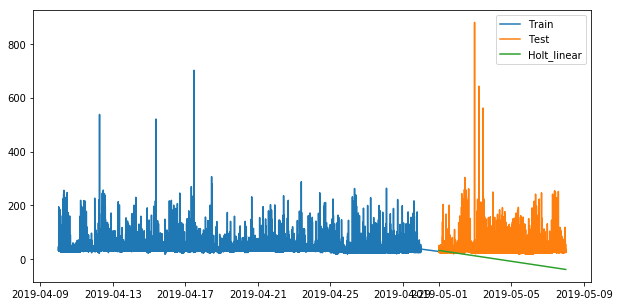

In [35]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,5))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()


In [36]:
rms = sqrt(mean_squared_error(test.value, y_hat_avg.Holt_linear))
print(rms)

51.80400903226765


In [37]:
frame12.device_ip.unique()

array(['10.254.228.8', '192.168.224.3', '10.254.231.7', '10.254.208.5',
       '192.168.242.6', '10.51.30.15', '10.54.34.34', '10.54.30.13',
       '172.16.92.1', '192.168.14.132', '10.157.30.11'], dtype=object)

In [38]:
sam3=frame12[frame12['device_ip']=='10.254.228.8']

In [39]:
sam3.metric_text.unique()

array(['Availability', 'Win-CPU Load', 'Mem Usage Load', 'CPU Load',
       'Swap Mem Usage'], dtype=object)

In [122]:
s=frame12[frame12['device_ip']=='10.51.30.15']

In [41]:
s.metric_text.unique()

array(['Availability', 'CPUUtilization', 'Total Memory Free',
       'ResponseTime', 'Total Memory Used', 'PacketLoss'], dtype=object)

In [42]:
sam3=sam3[sam3['metric_text']=='Win-CPU Load'][['time','metric_text','value']]
sam3.index=pd.to_datetime(sam3['time'])
sam3=sam3.drop(['time'],axis=1)

sam3.head()

,metric_text,value
time,,
2019-04-10 00:00:00,Win-CPU Load,0.01
2019-04-10 00:01:00,Win-CPU Load,0.00
2019-04-10 00:02:00,Win-CPU Load,0.00
2019-04-10 00:03:00,Win-CPU Load,0.15
2019-04-10 00:04:00,Win-CPU Load,0.10


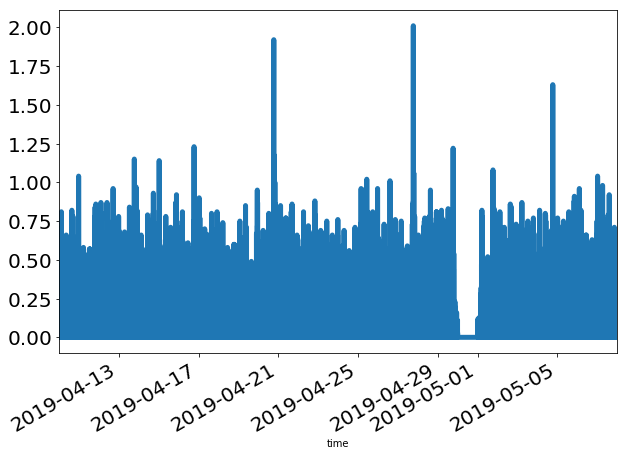

In [43]:
sam3['value'].plot(figsize=(10,7), linewidth=5, fontsize=20)
#sam3.xlabel('Time', fontsize=20);

 # Check For Trend

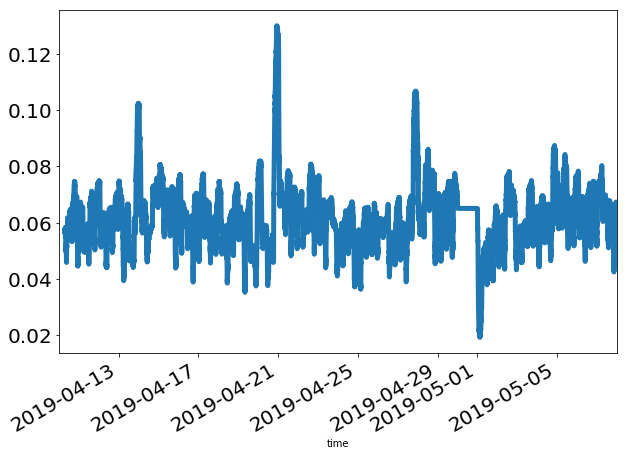

In [44]:
sam3['value'].rolling(360).mean().plot(figsize=(10,7), linewidth=5, fontsize=20)

# Check For Seasonality

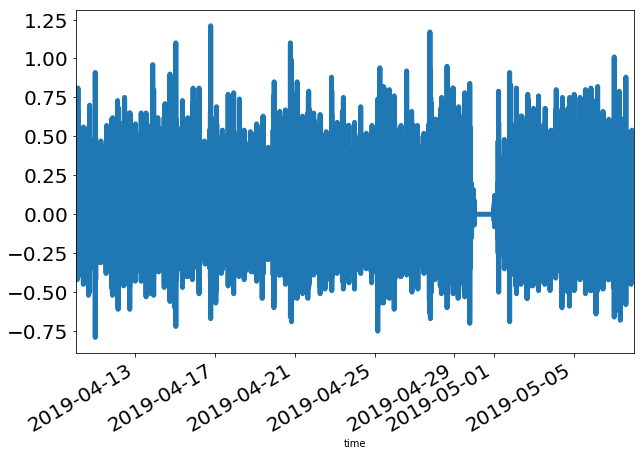

In [45]:
sam3['value'].diff().plot(figsize=(10,7), linewidth=5, fontsize=20)

(0, 100)

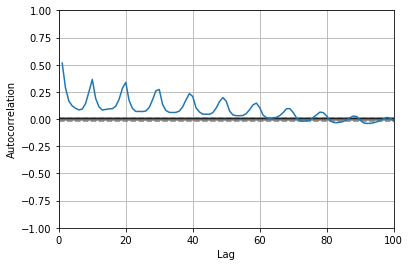

In [46]:
pd.plotting.autocorrelation_plot(sam3['value']);
plt.xlim(0,100)

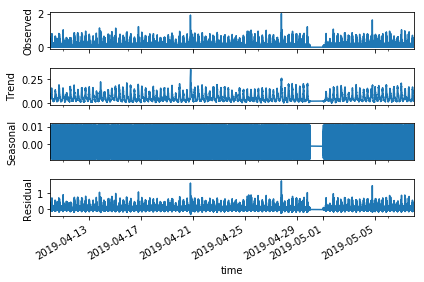

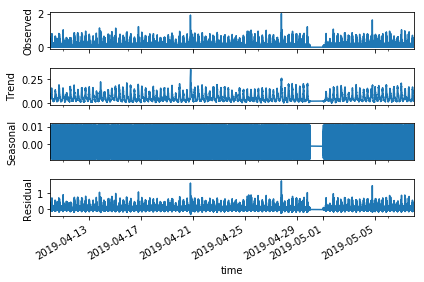

In [47]:
result = seasonal_decompose(sam3['value'], model='additive',freq=60)
result.plot()


In [124]:
s[s['metric_text']=='Availability'].head(30)

,customer_id,device_ip,interface,metric_text,date,time,hostname,metric_uid,value
106337,SCBDB-B20501,10.51.30.15,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:00:00,"""""",S1:P3,1.0
106338,SCBDB-B20501,10.51.30.15,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:00:02,"""""",S1:P3,1.0
106339,SCBDB-B20501,10.51.30.15,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:01:00,"""""",S1:P3,1.0
106340,SCBDB-B20501,10.51.30.15,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:01:01,"""""",S1:P3,1.0
106341,SCBDB-B20501,10.51.30.15,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:02:00,"""""",S1:P3,1.0
106342,SCBDB-B20501,10.51.30.15,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:02:01,"""""",S1:P3,1.0
106343,SCBDB-B20501,10.51.30.15,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:03:00,"""""",S1:P3,1.0
106344,SCBDB-B20501,10.51.30.15,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:03:01,"""""",S1:P3,1.0
106345,SCBDB-B20501,10.51.30.15,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:04:00,"""""",S1:P3,1.0
106346,SCBDB-B20501,10.51.30.15,NaN,Availability,2019-04-10 00:00:00,2019-04-10 00:04:01,"""""",S1:P3,1.0


In [53]:
def sec00(t):    
    t=t[:17]+'00'
    return(t) 

In [126]:
#for col in ['Availability','ResponseTime','Total Memory Used','CPUUtilization']:    
s['time']=s['time'].apply(lambda x : sec00(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


                     value
time                      
2019-04-10 00:00:00    1.0
2019-04-10 00:01:00    1.0
2019-04-10 00:02:00    1.0
2019-04-10 00:03:00    1.0
2019-04-10 00:04:00    1.0


<IPython.core.display.Javascript object>


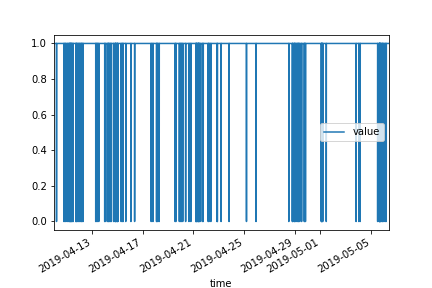

In [178]:
s1=s[s['metric_text']=='Availability']
s1= s1[['time','value']]
s1=s1.drop_duplicates()
s1.index=pd.to_datetime(s1['time'])
s1=s1.drop(['time'],axis=1)
print(s1.head())
s1.plot()

<IPython.core.display.Javascript object>


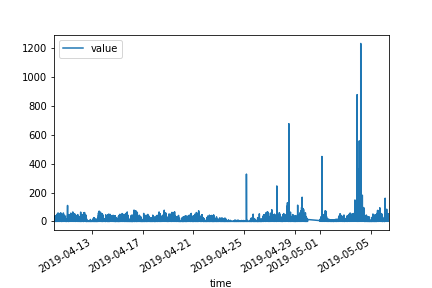

In [179]:
s2=s[s['metric_text']=='ResponseTime']
s2= s2[['time','value']]
#s2=s2.drop_duplicates()
s2.index=pd.to_datetime(s2['time'])
s2=s2.drop(['time'],axis=1)
s2.shape
s2.plot()

<IPython.core.display.Javascript object>


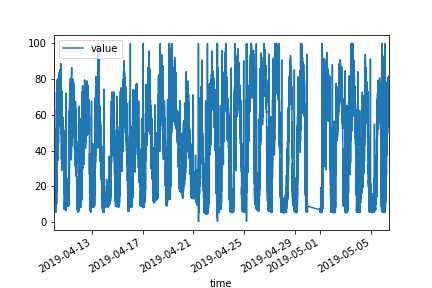

In [180]:
s3=s[s['metric_text']=='CPUUtilization']
s3= s3[['time','value']]
#s3=s3.drop_duplicates()
s3.index=pd.to_datetime(s3['time'])
s3=s3.drop(['time'],axis=1)
s3.plot()

<IPython.core.display.Javascript object>


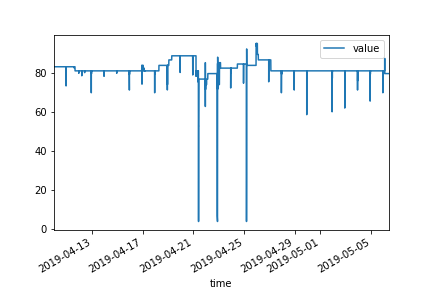

In [181]:
s4=s[s['metric_text']=='Total Memory Used']
s4= s4[['time','value']]
#s4=s4.drop_duplicates()
s4.index=pd.to_datetime(s4['time'])
s4=s4.drop(['time'],axis=1)
s4.plot()

In [172]:
s4.head()

,metric_text,value
time,,
2019-04-10 00:00:00,Total Memory Used,83.116295
2019-04-10 00:01:00,Total Memory Used,83.116295
2019-04-10 00:02:00,Total Memory Used,83.116295
2019-04-10 00:03:00,Total Memory Used,83.116295
2019-04-10 00:04:00,Total Memory Used,83.116295


In [205]:
merged=s1.merge(s2,on='time',how='left')
merged=merged.merge(s3,on='time',how='left')
merged=merged.merge(s4,on='time',how='left')
merged.columns=['Availability','ResponseTime','CPUUtilization','Total Memory Used']
merged.shape

(36543, 4)

<IPython.core.display.Javascript object>


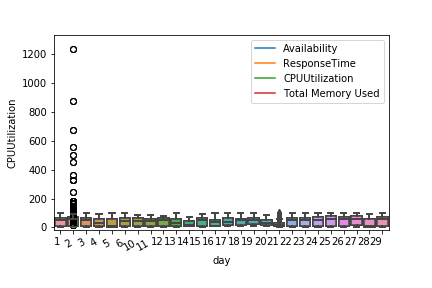

In [207]:
merged[merged.Availability==1].plot()

In [60]:
pivoted = pd.pivot_table(merged, values='value', index=['time'],
                     columns=['metric_text'])

In [61]:
pivoted.loc[pivoted['Availability']==0.5,'Availability']=0

In [62]:
pivoted['Availability'].value_counts()

1.0    36250
0.0      164
Name: Availability, dtype: int64

In [63]:
s1.value.value_counts()

1.0    36379
0.0      164
Name: value, dtype: int64

In [64]:
pivoted.head()

metric_text,Availability,CPUUtilization,ResponseTime,Total Memory Used
time,,,,
2019-04-10 00:00:00,1.0,13.249999,3.0,83.116295
2019-04-10 00:01:00,1.0,12.549999,1.0,83.116295
2019-04-10 00:02:00,1.0,12.580000,10.0,83.116295
2019-04-10 00:03:00,1.0,14.900001,4.0,83.116295
2019-04-10 00:04:00,1.0,12.100000,1.0,83.116295


In [247]:
pivoted_0=pivoted[pivoted['Availability']==0]
pivoted_1=pivoted[pivoted['Availability']==1]

In [147]:
pivoted_0.head()

metric_text,Availability,CPUUtilization,ResponseTime,Total Memory Used
time,,,,
2019-04-10 04:46:00,0.0,61.339996,1.0,83.116287
2019-04-10 18:42:00,0.0,22.770000,1.0,83.116287
2019-04-10 20:42:00,0.0,10.800000,4.0,83.116287
2019-04-10 22:25:00,0.0,9.240000,1.0,83.116287
2019-04-10 22:37:00,0.0,6.690000,1.0,83.116287


In [75]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


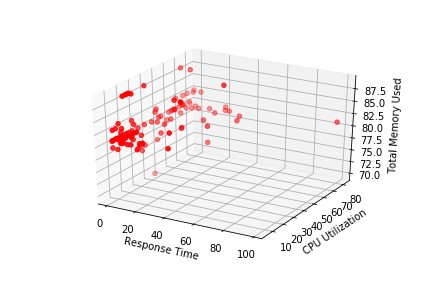

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [77]:
ax.scatter(pivoted_0['ResponseTime'], pivoted_0['CPUUtilization'], pivoted_0['Total Memory Used'], c='r', marker='o')

ax.set_xlabel('Response Time')
ax.set_ylabel('CPU Utilization')
ax.set_zlabel('Total Memory Used')

plt.show()

In [73]:
ax.scatter(pivoted_1['ResponseTime'], pivoted_1['CPUUtilization'], pivoted_1['Total Memory Used'], c='g', marker='o')

ax.set_xlabel('Response Time')
ax.set_ylabel('CPU Utilization')
ax.set_zlabel('Total Memory Used')

plt.show()

In [89]:
sa=sam1[sam1['metric_text']=='Availability']
sa.value.value_counts()

1.0    230060
0.0       355
Name: value, dtype: int64

In [101]:
sa[sa.value==0].head(100)

,customer_id,device_ip,interface,metric_text,date,time,hostname,metric_uid,value
2423,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-10 00:00:00,2019-04-10 07:34:30,Futura-PBX,S1:P3,0.0
4080,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-10 00:00:00,2019-04-10 12:11:00,Futura-PBX,S1:P3,0.0
5204,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-10 00:00:00,2019-04-10 15:29:40,Futura-PBX,S1:P3,0.0
5378,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-10 00:00:00,2019-04-10 15:58:40,Futura-PBX,S1:P3,0.0
129190,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 02:13:10,Futura-PBX,S1:P3,0.0
131463,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 08:32:30,Futura-PBX,S1:P3,0.0
131653,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 09:04:10,Futura-PBX,S1:P3,0.0
131654,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 09:04:20,Futura-PBX,S1:P3,0.0
132010,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 10:03:40,Futura-PBX,S1:P3,0.0
132554,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 11:34:20,Futura-PBX,S1:P3,0.0


In [198]:
sam1[(sam1['time']>='2019-04-11 04:45:00') & (sam1['metric_text']=='Availability')].head(10)

,customer_id,device_ip,interface,metric_text,date,time,hostname,metric_uid,value
130101,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 04:45:00,Futura-PBX,S1:P3,1.0
130102,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 04:45:10,Futura-PBX,S1:P3,1.0
130103,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 04:45:20,Futura-PBX,S1:P3,1.0
130104,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 04:45:30,Futura-PBX,S1:P3,1.0
130105,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 04:45:40,Futura-PBX,S1:P3,1.0
130106,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 04:45:50,Futura-PBX,S1:P3,1.0
130107,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 04:46:00,Futura-PBX,S1:P3,1.0
130108,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 04:46:10,Futura-PBX,S1:P3,1.0
130109,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 04:46:20,Futura-PBX,S1:P3,1.0
130110,SCBATMS87816,10.254.228.8,NaN,Availability,2019-04-11 00:00:00,2019-04-11 04:46:30,Futura-PBX,S1:P3,1.0


In [142]:
sam1.metric_text.unique()

array(['Availability', 'Win-CPU Load', 'Mem Usage Load', 'CPU Load',
       'Swap Mem Usage'], dtype=object)

In [209]:
s2[s2.value==s2.value.max()]

,value
time,
2019-05-04 04:45:00,1232.0


In [212]:
s1[s1.index>'2019-05-04 04:40:00'].head(10)

,value
time,
2019-05-04 04:41:00,1.0
2019-05-04 04:42:00,1.0
2019-05-04 04:43:00,1.0
2019-05-04 04:44:00,1.0
2019-05-04 04:45:00,1.0
2019-05-04 04:46:00,1.0
2019-05-04 04:47:00,1.0
2019-05-04 04:48:00,1.0
2019-05-04 04:49:00,1.0


In [238]:
pivoted.index=pd.to_datetime(pivoted.index)
pivoted['hour']=pivoted.index.hour
pivoted['day']= pivoted.index.day
pivoted['DayOfWeek']=pivoted.index.weekday

#Monday is 0 and Sunday is 6

In [239]:
pivoted.head()

metric_text,Availability,CPUUtilization,ResponseTime,Total Memory Used,hour,day,DayOfWeek
time,,,,,,,
2019-04-10 00:00:00,1.0,13.249999,3.0,83.116295,0,10,2
2019-04-10 00:01:00,1.0,12.549999,1.0,83.116295,0,10,2
2019-04-10 00:02:00,1.0,12.580000,10.0,83.116295,0,10,2
2019-04-10 00:03:00,1.0,14.900001,4.0,83.116295,0,10,2
2019-04-10 00:04:00,1.0,12.100000,1.0,83.116295,0,10,2


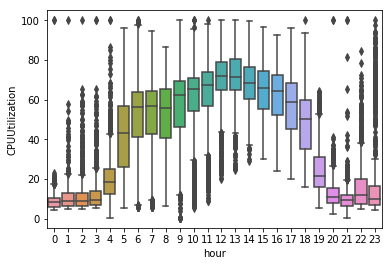

In [249]:
sns.boxplot(data=pivoted_1, x='hour', y='CPUUtilization');
plt.show()

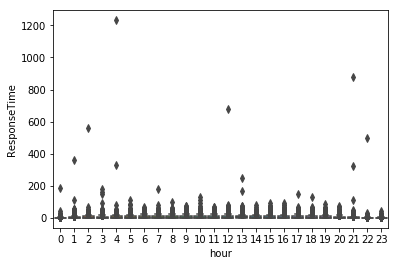

In [255]:
sns.boxplot(data=pivoted_1, x='hour', y='ResponseTime');
plt.show()

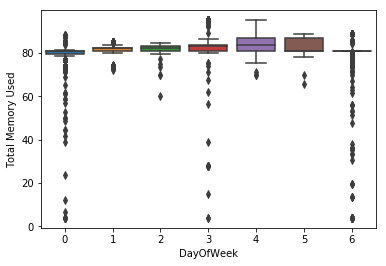

In [258]:
sns.boxplot(data=pivoted_1, x='DayOfWeek', y='Total Memory Used');
plt.show()

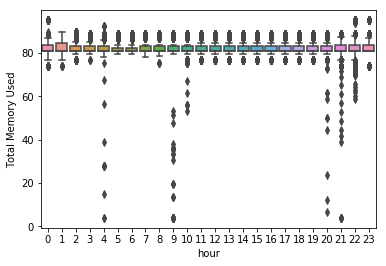

In [260]:
sns.boxplot(data=pivoted_1, x='hour', y='Total Memory Used');
plt.show()

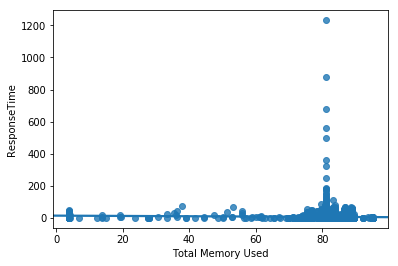

In [263]:
sns.regplot(x="Total Memory Used", y="ResponseTime", data=pivoted_1, x_jitter=.1)

In [282]:
n_pivoted_1=pivoted_1.dropna()

In [286]:
n_pivoted_0=pivoted_0.dropna()

In [283]:
stats.kendalltau(n_pivoted_1['CPUUtilization'], n_pivoted_1['ResponseTime'])

KendalltauResult(correlation=0.07237152533350648, pvalue=1.405079705210011e-79)

In [285]:
stats.kendalltau(n_pivoted_1['CPUUtilization'], n_pivoted_1['Total Memory Used'])

KendalltauResult(correlation=0.048471906804183576, pvalue=7.69883642022977e-42)

In [288]:
stats.ttest_ind(n_pivoted_1['CPUUtilization'],n_pivoted_0['CPUUtilization'])

Ttest_indResult(statistic=2.514768710053696, pvalue=0.011915349651237379)

In [289]:
stats.ttest_ind(n_pivoted_1['ResponseTime'],n_pivoted_0['ResponseTime'])

Ttest_indResult(statistic=-1.6271848775021787, pvalue=0.10370654733869619)

In [290]:
stats.ttest_ind(n_pivoted_1['Total Memory Used'],n_pivoted_0['Total Memory Used'])

Ttest_indResult(statistic=1.3716237255271115, pvalue=0.1701891104273973)